In [229]:
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import tensorflow as tf
from sklearn import tree
from sklearn.svm import SVC
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [178]:
df=pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [179]:
df.shape

(517, 31)

In [180]:

# Cheking duplicate rows
df.duplicated().sum()

8

In [181]:
# dropping them
df.drop_duplicates(inplace=True)

In [182]:
# Checking duplicate columns
df.T.duplicated().sum()

0

In [183]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [184]:
# Seems like we have alraedy labeled columns for 'month' and 'day'
# So removing them and storing with a new variable called new_df
new_df=df.drop(['month', 'day'],axis=1)
new_df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

datas are nice and clean and free from null values

In [186]:
pure_df=df.iloc[:,np.append(np.arange(11),[-1])]
pure_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [187]:
# description of our data
pure_df.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,509,509,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,178,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371
mean,NaN,NaN,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,NaN
std,NaN,NaN,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,NaN
75%,NaN,NaN,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,NaN


clearly, 'DMC','DC' have high variance<br> 
Notice 'area' column's max value is significantly different from other quantiles

In [188]:
# storing categotical columns and continious columns 
cat_cols=[x for x in pure_df.columns if df[x].dtype=='O']
cont_cols=[x for x in pure_df.columns if x not in cat_cols]

In [189]:
# checking the distribution of categorical columns
fig = make_subplots(rows=1, cols=3,subplot_titles=cat_cols)

for i,j in enumerate(cat_cols):
    fig.add_trace(go.Bar(x=df[j].value_counts().index, y=df[j].value_counts().values),row=1,col=i+1)
fig.update_layout(showlegend=False)
fig.show()

August and september month has a heighest chance of forest fire.<br>
Also sunday is the day we should care about<br>
Clearly we have a imbalanced data

In [190]:
# distribution of categorical columns
for column in cont_cols:
    fig = make_subplots(
        rows=2, cols=2,specs=[
                                [{"rowspan": 2, "colspan": 1},{}],
                                [None,{}]
                             ])

    fig.add_trace(
        go.Histogram(x= df[column]),
        row=1, col=1)

    fig.add_trace(
        go.Box(x= df[column],
               boxpoints='all',
               name=''),
        row=1, col=2)

    fig.add_trace(
        go.Violin(x=  df[column],
                  meanline_visible=True,
                  box_visible=True,
                  name=''),
        row=2, col=2)

    fig.update_layout(showlegend=False,
                      title_text=f'<b>{column}</b> :<br> \t Skewness= {stats.skew(df[column]):.3f}, Kurtosis= {stats.kurtosis(df[column]):.3f}')
    fig.show()

Noisy data, outliers are present in almost all the continious columns<br>
Except 'temp' column non of them coming from a normal distribution

In [191]:
# We will get into that later 
# Lets explore a little bit more

# Before that we have to know our data  


<pre><b>month</b> : month of the year
<b>day</b>   : day of the week

'Litter is the predominant fuel that drives surface fire behavior in most
 fire-prone forest and woodland ecosystems.'
'Duff is a soil layer of partly decaying organic material (see box) that
 includes sloughed bark, leaf litter, pine cones, roots, and woody fuels.'
'Drought is a deficiency of precipitation over an extended period of time
 (usually a season or more), resulting in a water shortage'

<b>FFMC</b>  : <i>The Fine Fuel Moisture Code</i> represents fuel moisture of forest 
        litter fuels under the shade of a forest canopy. It is intended to
        represent moisture conditions for shaded litter fuels, the equivalent
        of 16-hour timelag. It ranges from 0-101
<b>DMC</b>   : <i>The Duff Moisture Code</i> represents fuel moisture of decomposed
        organic material underneath the litter. System designers suggest
        that it is represents moisture conditions for the equivalent of 
        15-day (or 360 hr) timelag fuels. It is unitless and open ended.
        It may provide insight to live fuel moisture stress.
<b>DC</b>    :<i> The Drought Code</i> much like the Keetch-Byrum Drought Index, represents 
        drying deep into the soil. It approximates moisture conditions for
        the equivalent of 53-day (1272 hour) timelag fuels. It is unitless,
        with a maximum value of 1000. Extreme drought conditions have produced
        DC values near 800.
<b>ISI</b>   :<i> The Initial Spread Index</i> is analogous to the NFDRS Spread Component (SC).
       It integrates fuel moisture for fine dead fuels and surface windspeed
       to estimate a spread potential. ISI is a key input for fire behavior
       predictions in the FBP system. It is unitless and open ended. 
<b>temp</b>  : temperature in Celsius degrees 
<b>RH</b>    : relative humidity in %
<b>wind</b>  : wind speed in km/h
<b>rain  :</b> outside rain in mm/m2 

</pre>


Checking why August and September month has heighest forest fire occures

In [192]:
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

grouped_df=df[cont_cols].groupby(df['month']).mean().reset_index().sort_values('month',key = lambda x :x.apply(lambda x:month_dict[x[0].upper()+x[1:]]))
grouped_df.style.background_gradient('OrRd')

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
4,jan,50.400000,2.400000,90.350000,1.450000,5.250000,89.000000,2.000000,0.000000,0.000000
3,feb,82.905000,9.475000,54.670000,3.350000,9.635000,55.700000,3.755000,0.000000,6.275000
7,mar,89.401887,34.518868,75.850943,7.094340,13.009434,40.245283,4.969811,0.003774,3.898113
0,apr,85.788889,15.911111,48.555556,5.377778,12.044444,46.888889,4.666667,0.000000,8.891111
8,may,87.350000,26.700000,93.750000,4.600000,14.650000,67.000000,4.450000,0.000000,19.240000
6,jun,89.325000,93.337500,301.806250,12.068750,20.575000,45.562500,4.112500,0.000000,6.206250
5,jul,91.328125,110.387500,450.603125,9.393750,22.109375,45.125000,3.734375,0.006250,14.369687
1,aug,92.326404,152.841011,639.382584,11.129213,21.647191,45.297753,4.078652,0.056180,12.910056
11,sep,91.243023,120.922674,734.615698,8.577326,19.612209,42.843023,3.557558,0.000000,17.942616
10,oct,90.453333,41.420000,681.673333,7.146667,17.093333,37.466667,3.460000,0.000000,6.638000


In [193]:
row=1
col=1

fig=make_subplots(subplot_titles=grouped_df.columns[1:],
                  vertical_spacing=0.1,
                  rows=3,
                  cols=3,
                   )

for i in grouped_df.columns[1:]:
    fig.add_trace(
                go.Bar(
                         x=grouped_df['month'],
                         y=grouped_df[i],
                         name=i,
                         marker=dict(color = grouped_df[i],
                                     colorscale='reds') ),
                  row=row,
                  col=col )
    if row==3:
        row=1
        col+=1
    else:
        row+=1

fig.update_layout(showlegend=False,
                  height=800, 
                  width=1200,
                  margin=dict(l=5, r=1, t=20, b=5),
                  xaxis=dict(
                            showline=True,
                            showgrid=False,
                            showticklabels=True,
                            linecolor='#a6f0f5'),
                  yaxis=dict(
                            showline=True,
                            showgrid=False,
                            showticklabels=True,
                            linecolor='#a6f0f5'),
                  plot_bgcolor='white'
                 )
fig.show()

Note in August and september month has height average wind flows<br>
more the wind flows, more will be the spread of fire.<br>
Also FFMC is maximum in this season which is a fuel<br>
DC is lowest in these month, which shows a lowest moisture in the fuel.<br>
Rain is also month in those months<br>
'Temp' is more compared other months which shows a high humidity in air<br>
'ISI' which is a key factor to gain fire , is more in this month<br>

So these are the reason, why August and September has heighest forest fire has been seen.<br>
Also maximum area got burned


In [194]:
# Lets at what percentage area got burned in this month 

def plot_me(df,x,y,colorscale='orrd'):
    '''Plot a bar graph
       
       Parameters:
       
           df: your DataFrame,
            x: x-axis variable
            y: y-axis variable
       
       return:
       
           Your bar graph'''
    temp_df=df[y].groupby(pure_df[x]).sum().reset_index()
    fig=go.Figure()
    fig.add_trace(
                  go.Bar(x=temp_df[x],
                         y=temp_df[y],
                         marker=dict(color = temp_df[y],
                                     colorscale=colorscale),
                         hovertext =[f'{i/np.sum(temp_df[y])*100:.2f}%' for i in temp_df[y]],
                         name=''
                         ))
    fig.update_layout(xaxis=dict(linecolor='#a6f0f5',
                                 title=x),
                      yaxis=dict(linecolor='#a6f0f5',
                                 title=f'sum of {y}'),
                      plot_bgcolor='white',
                      showlegend=False,
                      autosize=False,
                      title_text=f'<b>{x} vs {y}</b>')
    fig.update_traces(marker_line_color='#0703fc')
    return fig

In [195]:
fig=plot_me(pure_df,'month','area')
fig.show()

# a df to store sum of area
temp_pie_df=pure_df.loc[:,['area','month']].groupby('month').sum().reset_index()

# pie chart
fig=go.Figure()
fig.add_pie(labels=temp_pie_df.month,
            values=temp_pie_df.area,
            hole=.5,
            automargin=False)
fig.update_layout(autosize=False)

We can see around <font color="red">47%</font>😥 of area got burned in <b>September</b> month<br>
Also in <b>August</b> month there is around <font color="orange">35%</font> area got burned<br>
And rest month have less than 19% area. 

In [196]:
# Checking the maximum area got burned
max(pure_df.area)

1090.84

In [197]:
# What about other features when maximum area got burned

# storing the column where heighest area got burned
temp_high_df=pure_df[pure_df.area==1090.84].iloc[:,:-1]
temp_high_df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84


In [198]:
pure_df.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,509,509,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,178,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371
mean,NaN,NaN,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,NaN
std,NaN,NaN,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,NaN
75%,NaN,NaN,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,NaN


In [199]:
# Plotting the graph
fig=make_subplots()
fig.add_bar(x=temp_high_df.columns,
            y=temp_high_df.values[0],
            name='At max area',
            width=0.5,
            marker_color='#fa0223')

fig.add_bar(x=temp_high_df.columns,
            y=pure_df.describe(include='all').loc['mean'].values,
            name='Average',
            opacity=0.4,
            width=0.75,
            marker_color='#7bfc77',
            marker_line_color='#026b02',
            marker_line_width=1.5 )

fig.add_bar(x=temp_high_df.columns,
            y=pure_df.describe(include='all').loc['max'].values,
            name='Peak',
            width=0.1,
            opacity=0.4,
            marker_color='#77edfc',
            marker_line_color='#026b02',
            marker_line_width=1.5 )

fig.update_layout(xaxis=dict(linecolor='#a6a2a2',
                                 title='month'),
                  yaxis=dict(linecolor='#a6a2a2',
                             title='count'),
                  plot_bgcolor='white',
                  barmode='overlay',
                  hovermode="x unified",
                  title_text='max(area) vs average vs peak ')
fig.add_annotation(
        x=0.01,
        text='September',
        yshift=40,
        align="center",
        showarrow=False,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8,
        textangle=-90)
fig.add_annotation(
        x=0.987,
        text='Saturday',
        yshift=34,
        align="center",
        showarrow=False,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8,
        textangle=-90)

Can see the day and month was Saturday and September respectively<br>
But remember that was not the mode or say frequent.<br>

All other factors are below the average, where as the wind was close to average value that day.
Also the temperature was greater than average.

The major factor is DMC (the fuel moisture) is high and DC (dryness of soil) is high 
<br>That might be the reason why maximum area got burned 

In [200]:
pure_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [201]:
(pure_df.area==0).value_counts()

False    269
True     240
Name: area, dtype: int64

In [202]:
# Checking how much area is not burned and why not
temp_pie_df=(pure_df.area==0).value_counts()
fig=go.Figure()
fig.add_trace(go.Pie(
                     labels=['Got Burned','Not Affected'],
                     values=temp_pie_df.values,
                     pull=[0.05, 0]))
fig.update_traces(hoverinfo='label+percent',
                  textinfo='value',
                  marker=dict(
                              colors=['#ffcd57','#80ff00'],
                              line=dict(
                                          color='#ff0000', 
                                          width=1
                                        )))
fig.update_layout(autosize=False,
                  title_text='How many time forest was not burned')

47% of the time area not affected by the forest fire

In [203]:
# But why!

# Making a dataframe to store numerical values
extended_pure_df=pure_df.iloc[:,:-2]

# new column to check wheather it is burned or not
extended_pure_df['burned or not']=pure_df['area'].apply(lambda x: 1 if x>0 else 0)
extended_pure_df.head()

# Now grouping them
temp_grouped_df=extended_pure_df.groupby('burned or not').mean()
temp_grouped_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
burned or not,,,,,,,,
0,90.154583,104.894583,519.877500,8.845833,18.356250,44.766667,3.900833,0.010833
1,91.031599,115.001115,572.688848,9.182156,19.319703,43.795539,4.110037,0.028996


In [204]:
# Plotting them 
fig=go.Figure()
fig.add_bar(x=temp_grouped_df.columns,
            y=temp_grouped_df.iloc[0],
            name='Not burned',
            marker_color='#adff1f',
            marker_line_color='#00ff26',
            marker_line_width=1.5 )
fig.add_bar(x=temp_grouped_df.columns,
            y=temp_grouped_df.iloc[1],
            name='Burned',
            marker_color='#fff480',
            marker_line_color='#ff0000',
            marker_line_width=1.5 )

fig.update_layout(xaxis=dict(linecolor='#a6a2a2',
                                 title='Features'),
                  yaxis=dict(linecolor='#a6a2a2',
                             title='count'),
                  autosize=False,
                  plot_bgcolor='white',
                  title_text='Area burned vs not burned')


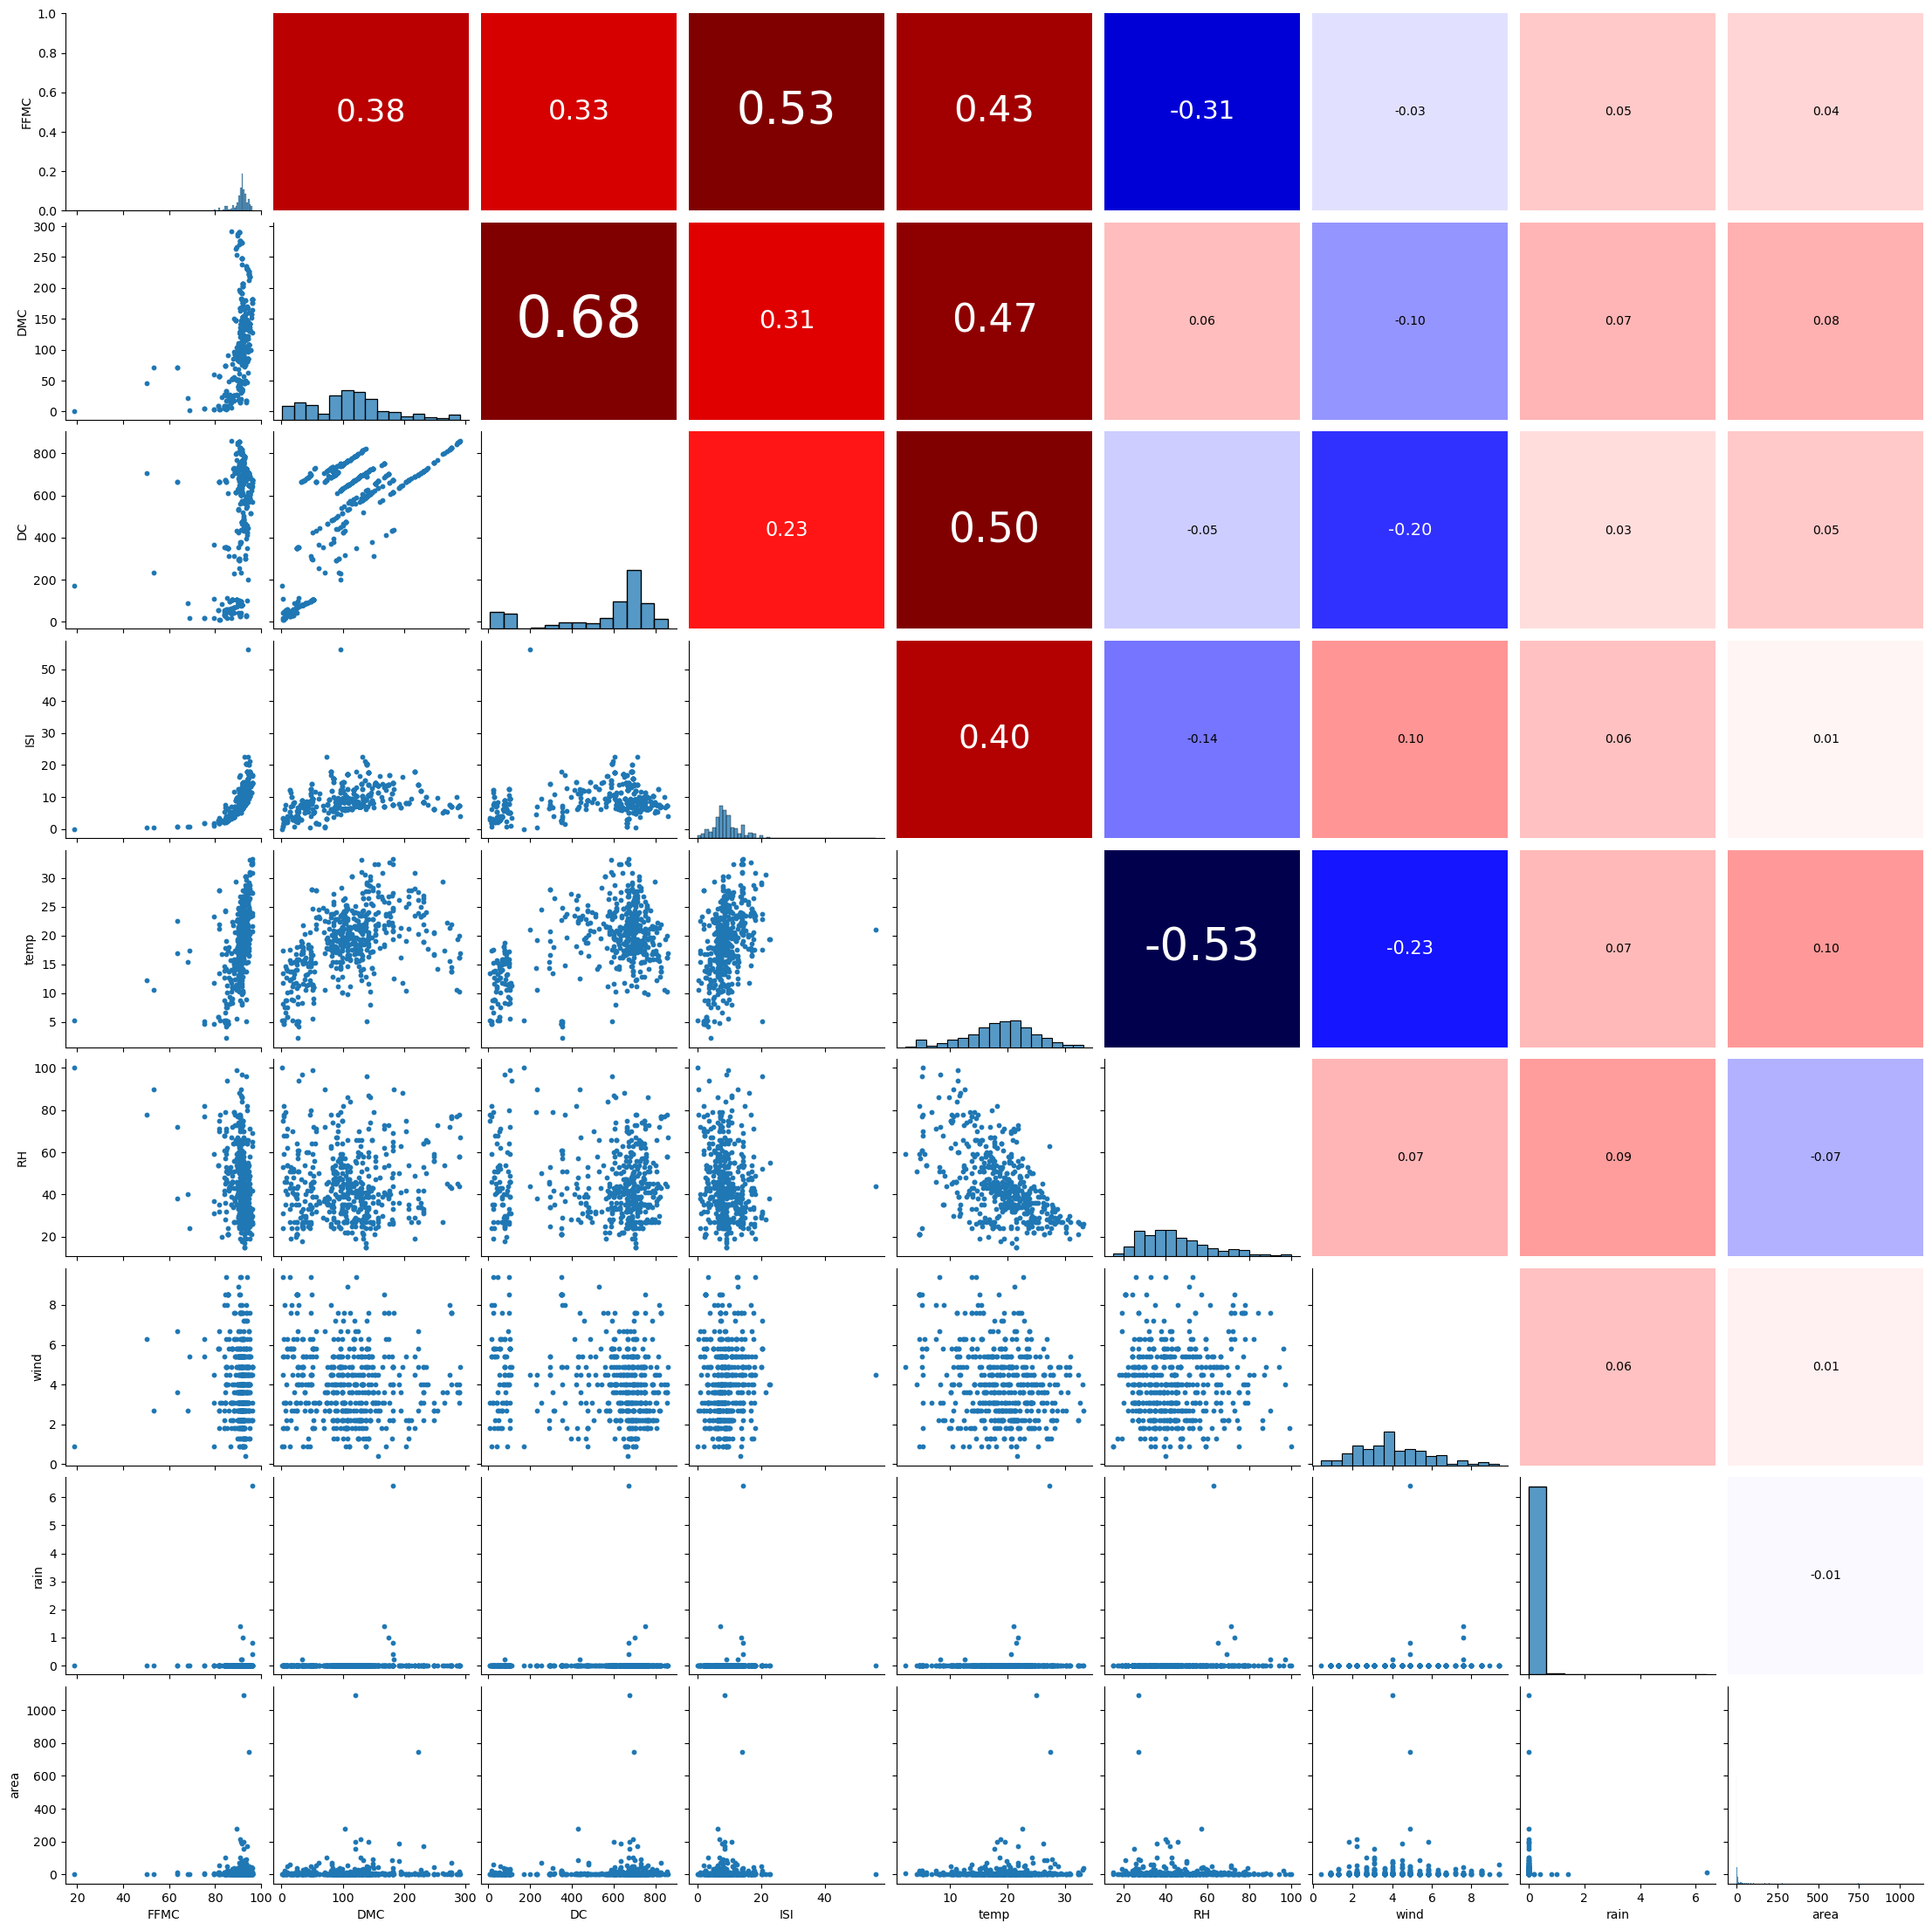

In [205]:
# pairplot with correation

def corrfunc(x, y, **kwds):
    cmap = kwds['cmap']
    norm = kwds['norm']
    ax = plt.gca()
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    sn.despine(ax=ax, bottom=True, top=True, left=True, right=True)
    r, _ = pearsonr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    lightness = (max(facecolor[:3]) + min(facecolor[:3]) ) / 2
    tam = int(70*abs(r))
    if tam < 10:
        tam = 10
    ax.annotate(f"{r:.2f}", xy=(.5, .5), xycoords=ax.transAxes,
            color='white' if lightness < 0.7 else 'black', size=tam, ha='center', va='center')


g = sn.PairGrid(pure_df)
g.map_lower(plt.scatter, s=10)
g.map_diag(sn.histplot, kde=False)
g.map_upper(corrfunc, cmap=plt.get_cmap('seismic'), norm=plt.Normalize(vmin=-.5, vmax=.5))
g.fig.subplots_adjust(wspace=0.06, hspace=0.06) 
plt.show()

We can see 'temp' is correlated to 'ISI','DC','DMC' and 'FFMC'. Its negatively correlated to 'RH'<br>
'FFMC' is correlated to 'DMC','DC','ISI','temp' and 'RH'<br>

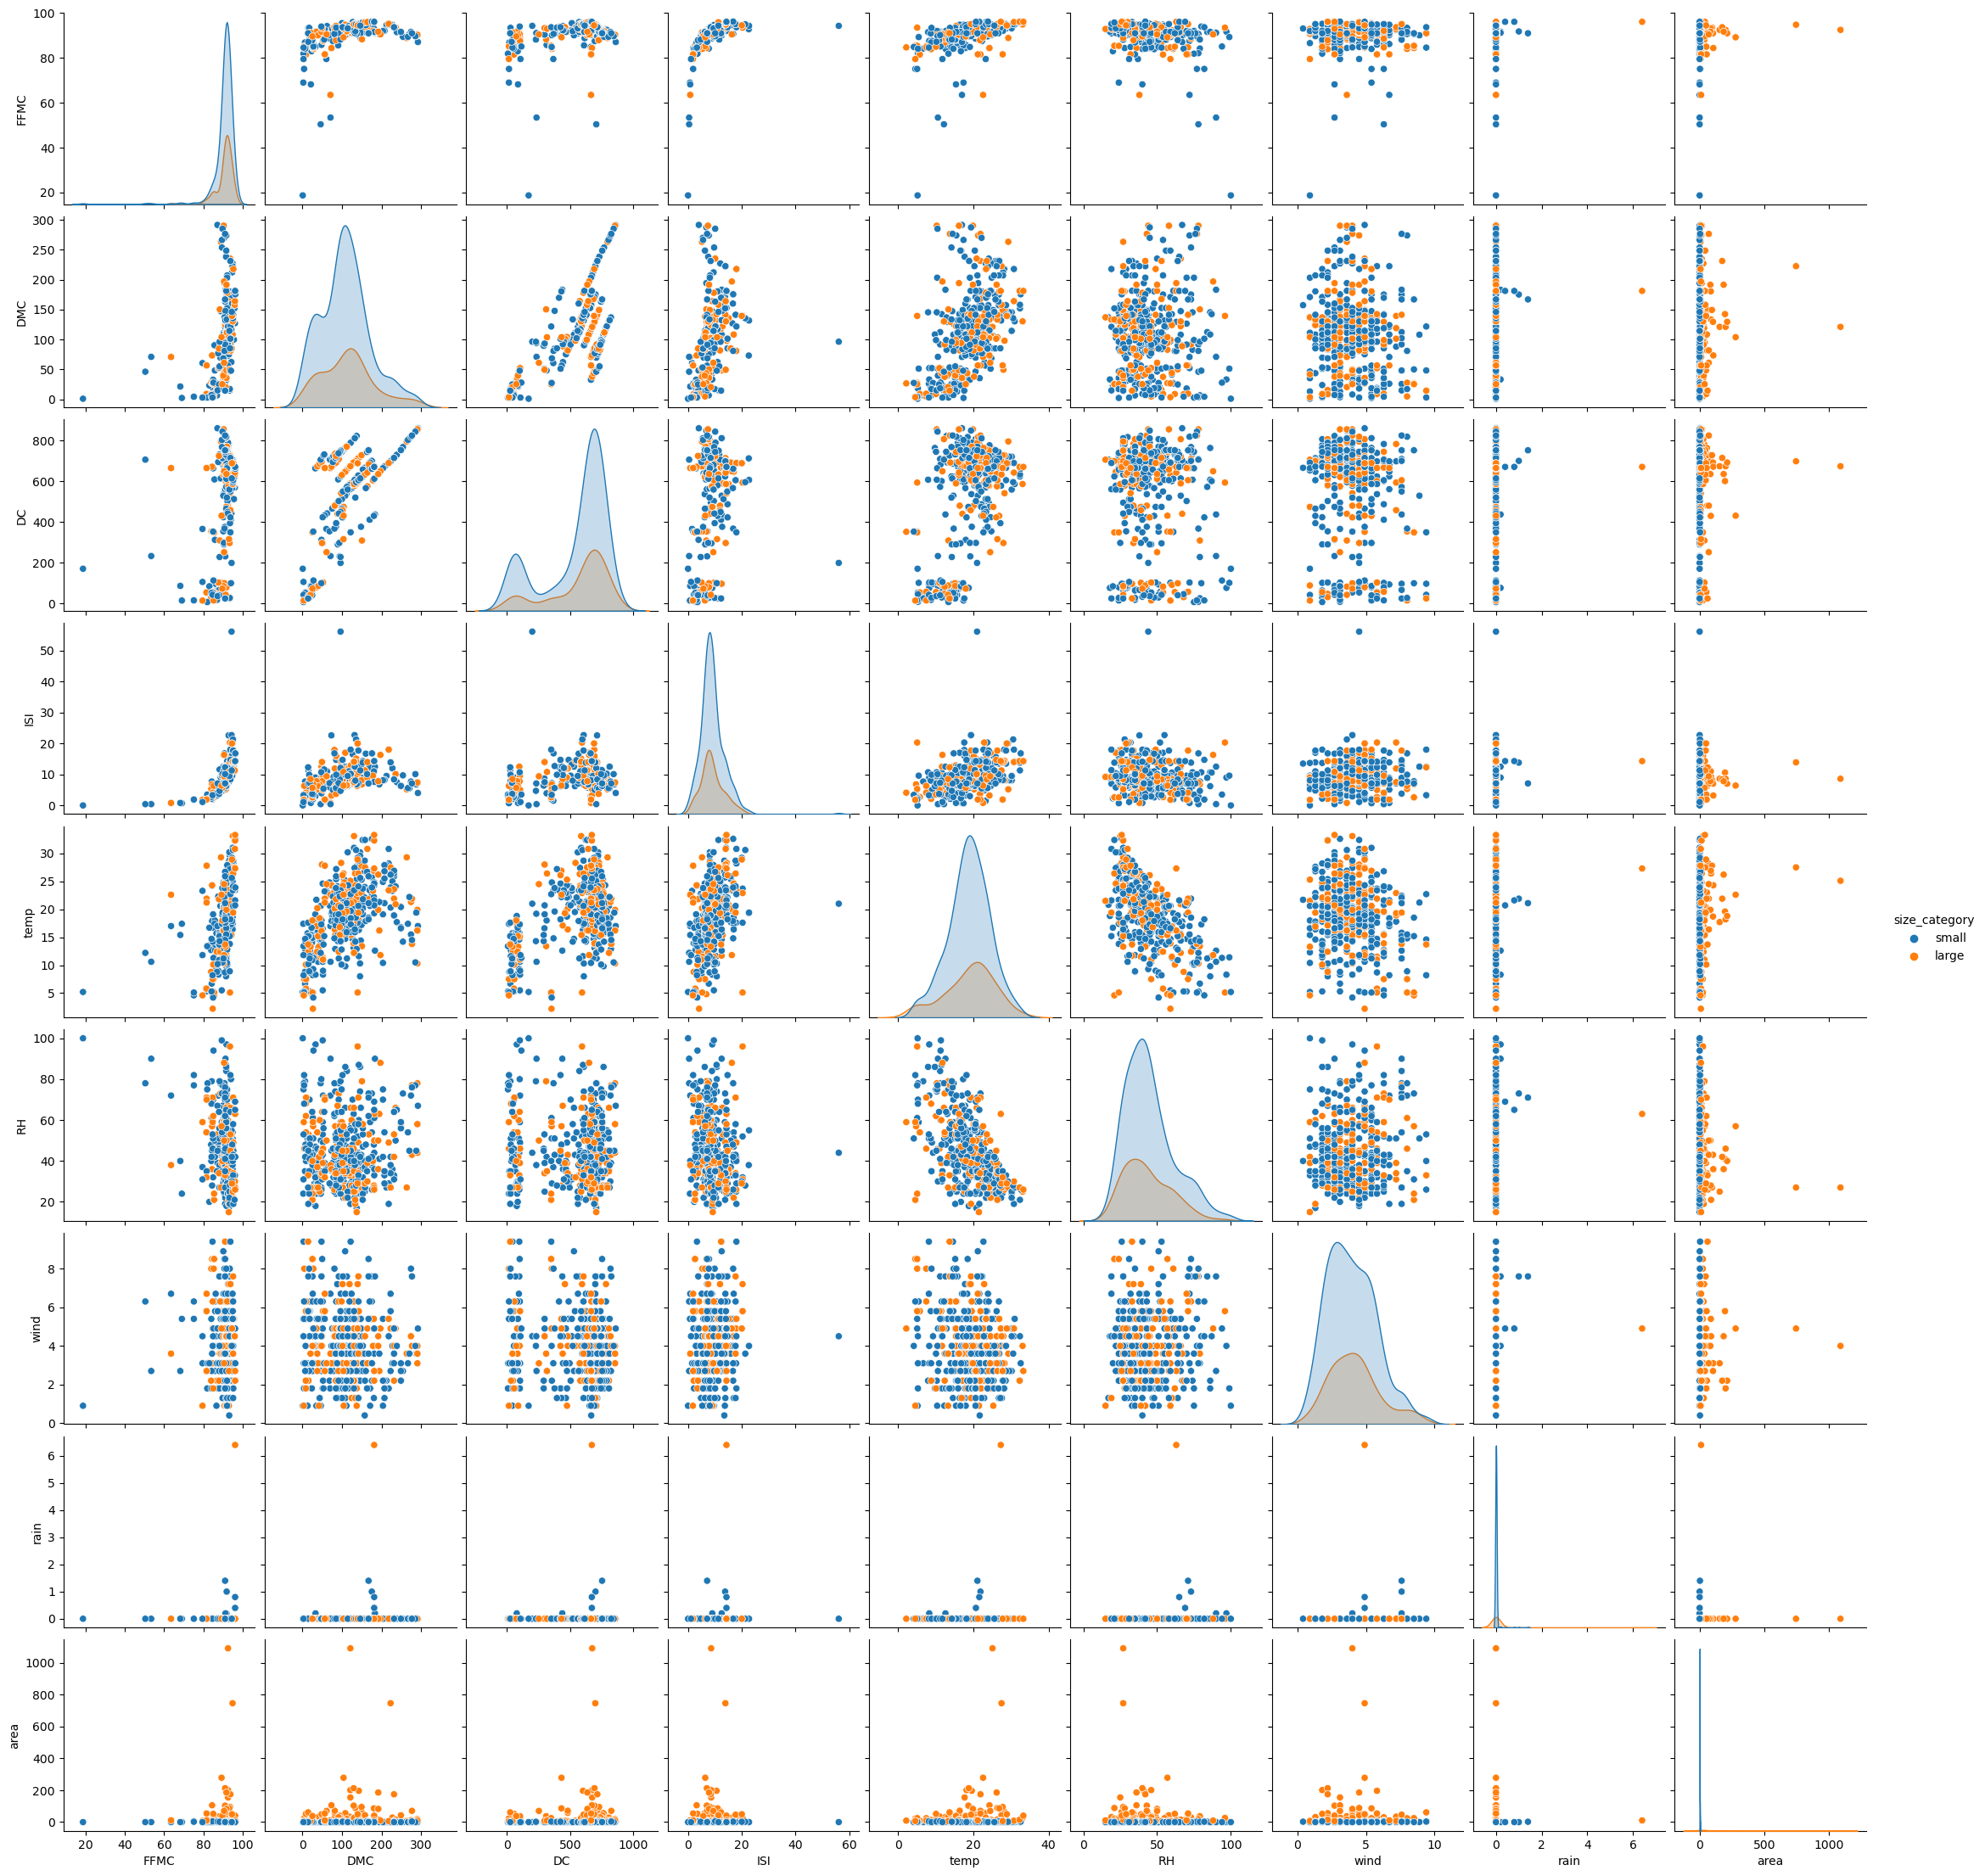

In [206]:
# Checking our distribution with respect to 'size_category'
sn.pairplot(pure_df,hue='size_category')

In [207]:
# labelling our data 
new_df['size_category']=new_df.size_category.apply(lambda x: {'small':0,'large':1}[x])

In [208]:
# Scalling our data
for i in cont_cols:
    new_df[i]=(new_df[i]-np.mean(new_df[i]))/np.std(new_df[i])

In [209]:
# Splitting our data
x_train,x_test,y_train,y_test=train_test_split(new_df.iloc[:,:-1],new_df.iloc[:,-1],random_state=11,stratify=new_df.iloc[:,-1])

In [210]:
x_train.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
176,-1.642876,-1.586657,-1.986623,-1.380520,-2.239016,0.596153,0.994136,-0.069035,-0.130839,0,...,0,0,0,0,0,0,0,0,0,0
35,-0.057310,-0.463368,0.735675,-0.594592,-0.114033,1.085476,0.271575,-0.069035,-0.202791,0,...,0,0,0,0,0,0,0,0,0,1
318,0.393135,0.137497,0.950636,-0.332617,0.468623,-1.055314,-1.006803,-0.069035,-0.202791,0,...,0,0,0,0,0,0,0,0,0,1
373,0.753491,1.759676,0.608231,1.064587,0.245843,-0.137832,-0.728894,-0.069035,-0.202791,0,...,0,0,0,0,0,0,0,0,0,0
334,0.176921,-0.028800,0.871992,-0.616424,-0.148307,0.412656,0.771809,-0.069035,-0.202791,0,...,0,0,0,0,0,0,0,0,0,1


In [211]:
def check_my_score(model,x_train,x_test,y_train,y_test):
    train_cm=confusion_matrix(y_train,model.predict(x_train))
    test_cm=confusion_matrix(y_test,model.predict(x_test))

    # plotting confusion metrics
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1,title='Train set')
    sn.heatmap(train_cm,annot=True,fmt=".0f",cmap='copper',cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.subplot(1,2,2,title='Test set')
    sn.heatmap(test_cm,annot=True,fmt=".0f",cbar=False)
    plt.show()

    # Classification reports
    print('On training set :\n ',classification_report(y_train,model.predict(x_train)))
    print('\n On testing set :\n ',classification_report(y_test,model.predict(x_test)))

    # ROC AUC
    fpr,tpr,threshold=roc_curve(y_train,model.predict_proba(x_train)[:,1])

    sn.lineplot(x = fpr, y = tpr,color='#730299',label=f"ROC AUC= {roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*100:.2f}")
    plt.plot([0,1],[0,1], linestyle='dotted')
    plt.legend()
    plt.show()


Building mode

In [212]:
tf.random.set_seed(11)     # Stopping the randomness

In [213]:
# Defining our model
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(28*1.5, activation='relu',input_dim=x_train.shape[1]),
                            # tf.keras.layers.Dense(256, activation='relu'),
                            # tf.keras.layers.Dense(256, activation='relu'),
                            tf.keras.layers.Dropout(0.9),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [214]:
# will compile with these 
model.compile(
            loss='binary_crossentropy',
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
            metrics=['AUC']
)

In [215]:
# Now fitting data in it
history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    epochs=700)

Epoch 1/700
12/12 [==============================] - 1s 30ms/step - loss: 0.7391 - auc: 0.5369 - val_loss: 0.5796 - val_auc: 0.6152
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6902 - auc: 0.5704 - val_loss: 0.5629 - val_auc: 0.6548
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6696 - auc: 0.6225 - val_loss: 0.5473 - val_auc: 0.6943
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6196 - auc: 0.6125 - val_loss: 0.5332 - val_auc: 0.7310
Epoch 5/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6169 - auc: 0.6155 - val_loss: 0.5275 - val_auc: 0.7332
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5627 - auc: 0.6499 - val_loss: 0.5274 - val_auc: 0.7393
Epoch 7/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5837 - auc: 0.6470 - val_loss: 0.5241 - val_auc: 0.7458
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5922 - 

In [216]:
print(history.history.keys())


dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


In [217]:
# defining a score checker
def compare_my_score(history,epochs):
    x=np.arange(1,epochs+1)

    fig=make_subplots(1,2,subplot_titles=['AUC','loss'],x_title='epochs')
    fig.add_trace(go.Scatter(x=x,y=history.history['auc'],name='auc',mode='lines'),1,1)
    fig.add_trace(go.Scatter(x=x,y=history.history['val_auc'],name='val_auc',mode='lines'),1,1)
    fig.add_trace(go.Scatter(x=x,y=history.history['loss'],name='loss',mode='lines'),1,2)
    fig.add_trace(go.Scatter(x=x,y=history.history['val_loss'],name='val_loss',mode='lines'),1,2)

    fig.update_layout(hovermode='x unified')
    return fig

In [218]:
compare_my_score(history,700)

In [222]:
# After so many hit and trial we achieved a good roc auc
# Now predicting all those values
new_df['predicted_size_category']=[1 if x>0.5 else 0 for x in model.predict(new_df.drop('size_category',axis=1))]


16/16 [==============================] - 0s 1ms/step


<AxesSubplot: >

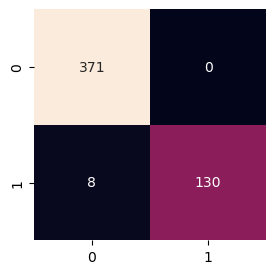

In [227]:
# Checking the confussion matrix
plt.figure(figsize=(3,3))
sn.heatmap(confusion_matrix(new_df['size_category'],new_df['predicted_size_category']),annot=True,cbar=False,fmt=".0f" )

In [230]:
# Classification report
print(classification_report(new_df['size_category'],new_df['predicted_size_category']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       371
           1       1.00      0.94      0.97       138

    accuracy                           0.98       509
   macro avg       0.99      0.97      0.98       509
weighted avg       0.98      0.98      0.98       509



In [231]:
new_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,predicted_size_category
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,1,...,0,0,0,1,0,0,0,0,0,0
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,0,...,0,0,0,0,0,0,1,0,0,0
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,1,...,0,0,0,1,0,0,0,0,0,0
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,-0.102277,0,...,0,0,0,0,0,0,0,0,1,0
513,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,0.644559,0,...,0,0,0,0,0,0,0,0,1,1
514,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,-0.028608,0,...,0,0,0,0,0,0,0,0,1,0
515,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,-0.202791,0,...,0,0,0,0,0,0,0,0,0,0
